# Fraud Detection Using Text - The Enron Scandal

![enron](enron.jpg)

## Welcome

## Dataset description

## Important libraries

In [1]:
# pandas & numpy:
import numpy as np
import pandas as pd

# visualization:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px

# tokenization:
import re
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
import string

# gensim:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

# scikit-learn:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


#keras:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences #We use this because some text are shorter than others. All text should have the same number of words

## Loading & understanding our data

In [2]:
df=pd.read_csv('Data/emails_cleaned.csv')
# With "pd.set_option('display.max_columns', None)" we see all the columns of the dataset.
pd.set_option('display.max_columns', None)
df.head()


,file,message,content,Message-ID,Date,From,To,Subject,Cc,Mime-Version,Content-Type,Content-Transfer-Encoding,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,has_other_content,if_forwarded
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,Here is our forecast\n\n,<18782981.1075855378110.JavaMail.evans@thyme,"Mon, 14 May 2001 16:39:00 -0700 (PDT",phillip.allen@enron.co,tim.belden@enron.co,NaN,NaN,1.0,text/plain; charset=us-asci,7bi,NaN,Phillip K Alle,Tim Belden <Tim Belden/Enron@EnronXGate,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-,pallen (Non-Privileged).pst,False,False
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,Traveling to have a business meeting takes the...,<15464986.1075855378456.JavaMail.evans@thyme,"Fri, 4 May 2001 13:51:00 -0700 (PDT",phillip.allen@enron.co,john.lavorato@enron.co,Re,NaN,1.0,text/plain; charset=us-asci,7bi,NaN,Phillip K Alle,John J Lavorato <John J Lavorato/ENRON@enronXg...,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-,pallen (Non-Privileged).pst,False,False
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test successful. way to go!!!,<24216240.1075855687451.JavaMail.evans@thyme,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT",phillip.allen@enron.co,leah.arsdall@enron.co,Re: tes,NaN,1.0,text/plain; charset=us-asci,7bi,NaN,Phillip K Alle,Leah Van Arsdal,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mai,Allen-,pallen.nsf,False,False
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Randy,\n\n Can you send me a schedule of the s...",<13505866.1075863688222.JavaMail.evans@thyme,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT",phillip.allen@enron.co,randall.gay@enron.co,NaN,NaN,1.0,text/plain; charset=us-asci,7bi,NaN,Phillip K Alle,Randall L Ga,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mai,Allen-,pallen.nsf,False,False
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,Let's shoot for Tuesday at 11:45.,<30922949.1075863688243.JavaMail.evans@thyme,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT",phillip.allen@enron.co,greg.piper@enron.co,Re: Hell,NaN,1.0,text/plain; charset=us-asci,7bi,NaN,Phillip K Alle,Greg Pipe,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mai,Allen-,pallen.nsf,False,False


In [3]:
def clean_data(df):
    
    df=df.drop(columns=['file', 'message', 'Cc', 'Mime-Version', 'Content-Type','Content-Transfer-Encoding','Date',
                        'Bcc', 'X-From', 'X-To', 'X-cc', 'X-bcc','X-Folder', 'X-Origin', 'X-FileName', 'has_other_content', 'if_forwarded'])
    df.columns=[e.lower().replace(' ', '_') for e in df.columns]
    
    return df

In [4]:
df=clean_data(df)
df

,content,message-id,from,to,subject
0,Here is our forecast\n\n,<18782981.1075855378110.JavaMail.evans@thyme,phillip.allen@enron.co,tim.belden@enron.co,NaN
1,Traveling to have a business meeting takes the...,<15464986.1075855378456.JavaMail.evans@thyme,phillip.allen@enron.co,john.lavorato@enron.co,Re
2,test successful. way to go!!!,<24216240.1075855687451.JavaMail.evans@thyme,phillip.allen@enron.co,leah.arsdall@enron.co,Re: tes
3,"Randy,\n\n Can you send me a schedule of the s...",<13505866.1075863688222.JavaMail.evans@thyme,phillip.allen@enron.co,randall.gay@enron.co,NaN
4,Let's shoot for Tuesday at 11:45.,<30922949.1075863688243.JavaMail.evans@thyme,phillip.allen@enron.co,greg.piper@enron.co,Re: Hell
...,...,...,...,...,...
517392,This is a trade with OIL-SPEC-HEDGE-NG (John L...,<26807948.1075842029936.JavaMail.evans@thyme,john.zufferli@enron.co,kori.loibl@enron.co,Trade with John Lavorat
517393,Some of my position is with the Alberta Term b...,<25835861.1075842029959.JavaMail.evans@thyme,john.zufferli@enron.co,john.lavorato@enron.co,Gas Hedge
517394,2\n\n -----Original Message-----\nFrom: \tDouc...,<28979867.1075842029988.JavaMail.evans@thyme,john.zufferli@enron.co,dawn.doucet@enron.co,RE: CONFIDENTIA
517395,Analyst\t\t\t\t\tRank\n\nStephane Brodeur\t\t\...,<22052556.1075842030013.JavaMail.evans@thyme,john.zufferli@enron.co,jeanie.slone@enron.co,Calgary Analyst/Associat


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517397 entries, 0 to 517396
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   content     491133 non-null  object
 1   message-id  517397 non-null  object
 2   from        517397 non-null  object
 3   to          495552 non-null  object
 4   subject     498118 non-null  object
dtypes: object(5)
memory usage: 19.7+ MB


In [6]:
df.isnull().sum()

content       26264
message-id        0
from              0
to            21845
subject       19279
dtype: int64

In [7]:
df=df.dropna().reset_index(drop=True)
df

,content,message-id,from,to,subject
0,Traveling to have a business meeting takes the...,<15464986.1075855378456.JavaMail.evans@thyme,phillip.allen@enron.co,john.lavorato@enron.co,Re
1,test successful. way to go!!!,<24216240.1075855687451.JavaMail.evans@thyme,phillip.allen@enron.co,leah.arsdall@enron.co,Re: tes
2,Let's shoot for Tuesday at 11:45.,<30922949.1075863688243.JavaMail.evans@thyme,phillip.allen@enron.co,greg.piper@enron.co,Re: Hell
3,"Greg,\n\n How about either next Tuesday or Thu...",<30965995.1075863688265.JavaMail.evans@thyme,phillip.allen@enron.co,greg.piper@enron.co,Re: Hell
4,any morning between 10 and 11:30,<17189699.1075863688308.JavaMail.evans@thyme,phillip.allen@enron.co,joyce.teixeira@enron.co,Re: PRC review - phone call
...,...,...,...,...,...
451600,This is a trade with OIL-SPEC-HEDGE-NG (John L...,<26807948.1075842029936.JavaMail.evans@thyme,john.zufferli@enron.co,kori.loibl@enron.co,Trade with John Lavorat
451601,Some of my position is with the Alberta Term b...,<25835861.1075842029959.JavaMail.evans@thyme,john.zufferli@enron.co,john.lavorato@enron.co,Gas Hedge
451602,2\n\n -----Original Message-----\nFrom: \tDouc...,<28979867.1075842029988.JavaMail.evans@thyme,john.zufferli@enron.co,dawn.doucet@enron.co,RE: CONFIDENTIA
451603,Analyst\t\t\t\t\tRank\n\nStephane Brodeur\t\t\...,<22052556.1075842030013.JavaMail.evans@thyme,john.zufferli@enron.co,jeanie.slone@enron.co,Calgary Analyst/Associat


In [8]:
#we want to join all text data in one single column.We will create a new column called "completed_text"
df["completed_text"]=df["subject"]+df["content"]

In [9]:
df

,content,message-id,from,to,subject,completed_text
0,Traveling to have a business meeting takes the...,<15464986.1075855378456.JavaMail.evans@thyme,phillip.allen@enron.co,john.lavorato@enron.co,Re,ReTraveling to have a business meeting takes t...
1,test successful. way to go!!!,<24216240.1075855687451.JavaMail.evans@thyme,phillip.allen@enron.co,leah.arsdall@enron.co,Re: tes,Re: testest successful. way to go!!!
2,Let's shoot for Tuesday at 11:45.,<30922949.1075863688243.JavaMail.evans@thyme,phillip.allen@enron.co,greg.piper@enron.co,Re: Hell,Re: HellLet's shoot for Tuesday at 11:45.
3,"Greg,\n\n How about either next Tuesday or Thu...",<30965995.1075863688265.JavaMail.evans@thyme,phillip.allen@enron.co,greg.piper@enron.co,Re: Hell,"Re: HellGreg,\n\n How about either next Tuesda..."
4,any morning between 10 and 11:30,<17189699.1075863688308.JavaMail.evans@thyme,phillip.allen@enron.co,joyce.teixeira@enron.co,Re: PRC review - phone call,Re: PRC review - phone callany morning between...
...,...,...,...,...,...,...
451600,This is a trade with OIL-SPEC-HEDGE-NG (John L...,<26807948.1075842029936.JavaMail.evans@thyme,john.zufferli@enron.co,kori.loibl@enron.co,Trade with John Lavorat,Trade with John LavoratThis is a trade with OI...
451601,Some of my position is with the Alberta Term b...,<25835861.1075842029959.JavaMail.evans@thyme,john.zufferli@enron.co,john.lavorato@enron.co,Gas Hedge,Gas HedgeSome of my position is with the Alber...
451602,2\n\n -----Original Message-----\nFrom: \tDouc...,<28979867.1075842029988.JavaMail.evans@thyme,john.zufferli@enron.co,dawn.doucet@enron.co,RE: CONFIDENTIA,RE: CONFIDENTIA2\n\n -----Original Message----...
451603,Analyst\t\t\t\t\tRank\n\nStephane Brodeur\t\t\...,<22052556.1075842030013.JavaMail.evans@thyme,john.zufferli@enron.co,jeanie.slone@enron.co,Calgary Analyst/Associat,Calgary Analyst/AssociatAnalyst\t\t\t\t\tRank\...


In [10]:
# Let's see how looks the first element of the column "completed_text"
df['completed_text'][0]

"ReTraveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the presenter speaks and the others are quiet just waiting for their turn.   The meetings might be better if held in a round table discussion format.  \n\nMy suggestion for where to go is Austin.  Play golf and rent a ski boat and jet ski's.  Flying somewhere takes too much time.\n"

In [11]:
# Now that we have joined the columns "subject" and "content" into one column, we can delete them 
df=df.drop(columns=['content', 'subject'],axis=1)

## Detecting fraud using text mining

In order to clean our text data we need to follow these steps:
    <ol>
  <li>Tokenization</li>
  <li>Remove all Stopwords</li>
  <li>Lemanize your words</li>
  <li>Stem your words</li>
</ol>

In [12]:
#now he are going to get the stopwords for English
stop_words = list(stopwords.words('english')) 
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
#get additional stop words from nltk
stop_words.extend(['from','to','cc','http', 're', 'www', 'com'])

In [14]:
# Remove stopwords and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [31]:
# Apply the function to the dataframe
df['clean_text'] = df['completed_text'].apply(preprocess)

In [32]:
# Now we can compare the columns "completed_text" and "clean_text"
#Show completed_text news
df['completed_text'][0]

"ReTraveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the presenter speaks and the others are quiet just waiting for their turn.   The meetings might be better if held in a round table discussion format.  \n\nMy suggestion for where to go is Austin.  Play golf and rent a ski boat and jet ski's.  Flying somewhere takes too much time.\n"

In [33]:
print(df['clean_text'][0])

['retraveling', 'business', 'meeting', 'takes', 'trip', 'especially', 'prepare', 'presentation', 'suggest', 'holding', 'business', 'plan', 'meetings', 'trip', 'formal', 'business', 'meetings', 'honest', 'opinions', 'trip', 'desired', 'necessary', 'business', 'meetings', 'think', 'productive', 'stimulate', 'discussions', 'different', 'groups', 'working', 'presenter', 'speaks', 'quiet', 'waiting', 'turn', 'meetings', 'better', 'held', 'round', 'table', 'discussion', 'format', 'suggestion', 'austin', 'play', 'golf', 'rent', 'boat', 'flying', 'takes', 'time']


In [34]:
# Obtain the total words present in the dataset
list_of_words = []
for i in df.clean_text:
    for j in i:
        list_of_words.append(j)

In [35]:
list_of_words

['retraveling',
 'business',
 'meeting',
 'takes',
 'trip',
 'especially',
 'prepare',
 'presentation',
 'suggest',
 'holding',
 'business',
 'plan',
 'meetings',
 'trip',
 'formal',
 'business',
 'meetings',
 'honest',
 'opinions',
 'trip',
 'desired',
 'necessary',
 'business',
 'meetings',
 'think',
 'productive',
 'stimulate',
 'discussions',
 'different',
 'groups',
 'working',
 'presenter',
 'speaks',
 'quiet',
 'waiting',
 'turn',
 'meetings',
 'better',
 'held',
 'round',
 'table',
 'discussion',
 'format',
 'suggestion',
 'austin',
 'play',
 'golf',
 'rent',
 'boat',
 'flying',
 'takes',
 'time',
 'testest',
 'successful',
 'helllet',
 'shoot',
 'tuesday',
 'hellgreg',
 'tuesday',
 'thursday',
 'phillip',
 'review',
 'phone',
 'callany',
 'morning',
 'high',
 'speed',
 'internet',
 'acces',
 'login',
 'pallen',
 'davis',
 'think',
 'required',
 'static',
 'address',
 'gate',
 'company',
 'fixed',
 'forward',
 'collar',
 'floor',
 'price',
 'termmr',
 'buckner',
 'delivered',
 

In [36]:
len(list_of_words)

45513057

In [37]:
# Obtain the total number of unique words
total_words = len(np.unique(list_of_words))
total_words

453539

In [38]:
# join the words into a string
df['clean_joined'] = df['clean_text'].apply(lambda x: " ".join(x))

In [39]:
df['clean_joined'][0]

'retraveling business meeting takes trip especially prepare presentation suggest holding business plan meetings trip formal business meetings honest opinions trip desired necessary business meetings think productive stimulate discussions different groups working presenter speaks quiet waiting turn meetings better held round table discussion format suggestion austin play golf rent boat flying takes time'

## Fraud flags

In [40]:
# Now that we have all the text data together, we can flag some terms as "fraud suspect"
# WE know that Enron employees activaley participated in the fraud by keeping the stock price manually high. 
# We can create a list of fraudulent terms that helps us to find the emails with reference to the word "stock".

fraud_list=['stock','enron stock','sell stock','bonus','wall street','the market']

# Now we filter the column completed text using the list "fraud_list".


filtered_emails = df.loc[df['clean_joined'].str.contains('|'.join(fraud_list), na=False)]
print(filtered_emails)


                                          message-id  \
176     <21041312.1075855725847.JavaMail.evans@thyme   
239     <23792894.1075855729213.JavaMail.evans@thyme   
270     <29790972.1075855665306.JavaMail.evans@thyme   
285      <2999155.1075855665812.JavaMail.evans@thyme   
294       <718623.1075855665857.JavaMail.evans@thyme   
...                                              ...   
451544  <19658689.1075842028610.JavaMail.evans@thyme   
451551   <6198978.1075842028789.JavaMail.evans@thyme   
451552  <33268729.1075842028813.JavaMail.evans@thyme   
451553  <30044691.1075842028836.JavaMail.evans@thyme   
451584  <23888524.1075842029528.JavaMail.evans@thyme   

                                          from  \
176                     phillip.allen@enron.co   
239                     phillip.allen@enron.co   
270     1.11913372.-2@multexinvestornetwork.co   
285          market-reply@listserv.dowjones.co   
294                      webmaster@earnings.co   
...                        

In [41]:
# "Filtered_emails" represents the emails with fraudulent terminology. 
# We will create a new column named fraud in the dataframe. 
# The new column will have 2 values: 0: non-fraud ; 1: fraud

df['fraud'] = np.where((df['clean_joined'].str.contains('|'.join(fraud_list)) == True), 1, 0)
        
df      

,message-id,from,to,completed_text,clean_text,clean_joined,fraud
0,<15464986.1075855378456.JavaMail.evans@thyme,phillip.allen@enron.co,john.lavorato@enron.co,ReTraveling to have a business meeting takes t...,"[retraveling, business, meeting, takes, trip, ...",retraveling business meeting takes trip especi...,0
1,<24216240.1075855687451.JavaMail.evans@thyme,phillip.allen@enron.co,leah.arsdall@enron.co,Re: testest successful. way to go!!!,"[testest, successful]",testest successful,0
2,<30922949.1075863688243.JavaMail.evans@thyme,phillip.allen@enron.co,greg.piper@enron.co,Re: HellLet's shoot for Tuesday at 11:45.,"[helllet, shoot, tuesday]",helllet shoot tuesday,0
3,<30965995.1075863688265.JavaMail.evans@thyme,phillip.allen@enron.co,greg.piper@enron.co,"Re: HellGreg,\n\n How about either next Tuesda...","[hellgreg, tuesday, thursday, phillip]",hellgreg tuesday thursday phillip,0
4,<17189699.1075863688308.JavaMail.evans@thyme,phillip.allen@enron.co,joyce.teixeira@enron.co,Re: PRC review - phone callany morning between...,"[review, phone, callany, morning]",review phone callany morning,0
...,...,...,...,...,...,...,...
451600,<26807948.1075842029936.JavaMail.evans@thyme,john.zufferli@enron.co,kori.loibl@enron.co,Trade with John LavoratThis is a trade with OI...,"[trade, john, lavoratthis, trade, spec, hedge,...",trade john lavoratthis trade spec hedge john l...,0
451601,<25835861.1075842029959.JavaMail.evans@thyme,john.zufferli@enron.co,john.lavorato@enron.co,Gas HedgeSome of my position is with the Alber...,"[hedgesome, position, alberta, term, book, sen...",hedgesome position alberta term book send posi...,0
451602,<28979867.1075842029988.JavaMail.evans@thyme,john.zufferli@enron.co,dawn.doucet@enron.co,RE: CONFIDENTIA2\n\n -----Original Message----...,"[confidentia, original, message, doucet, dawn,...",confidentia original message doucet dawn sent ...,0
451603,<22052556.1075842030013.JavaMail.evans@thyme,john.zufferli@enron.co,jeanie.slone@enron.co,Calgary Analyst/AssociatAnalyst\t\t\t\t\tRank\...,"[calgary, analyst, associatanalyst, rank, step...",calgary analyst associatanalyst rank stephane ...,0


In [42]:
count = df['fraud'].value_counts()
print(count)

0    435914
1     15691
Name: fraud, dtype: int64


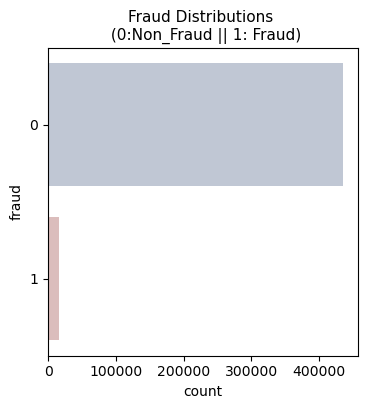

In [43]:
#Plot the count plot for fraudulent and no fraudulent emails
plt.figure(figsize = (4, 4))
sns.countplot(y = "fraud", data = df,palette='vlag')
plt.title('Fraud Distributions \n (0:Non_Fraud || 1: Fraud)', fontsize=11)
plt.show()

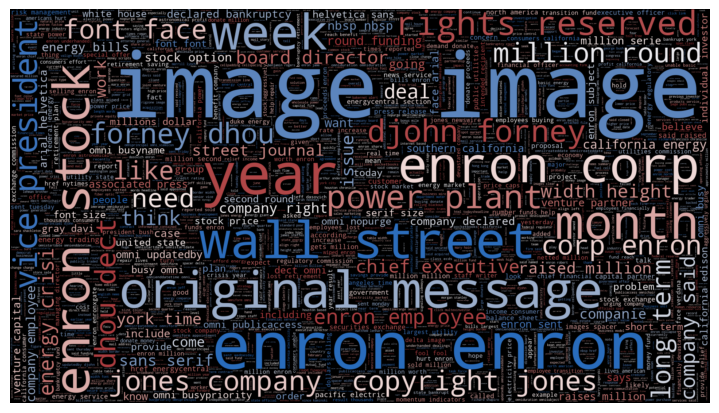

In [44]:
# plot the word cloud for text that is considered "fraud"
plt.figure(figsize = (7,7)) 
wc = WordCloud(max_words = 2000 , width = 1920 , height = 1080 ,colormap='vlag', stopwords = stop_words).generate(" ".join(df[df.fraud == 1].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

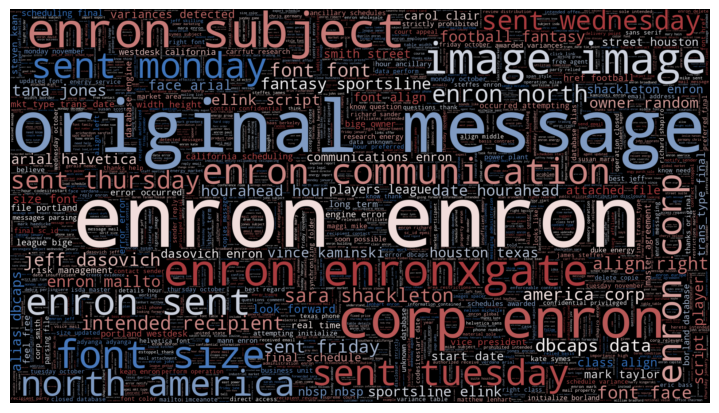

In [45]:
# plot the word cloud for text that is considered "non-fraud"
plt.figure(figsize = (7,7)) 
wc = WordCloud(max_words = 2000 , width = 1920 , height = 1080 ,colormap='vlag', stopwords = stop_words).generate(" ".join(df[df.fraud == 0].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [46]:
df=df.drop(columns='fraud',axis=1)

In [47]:
# Define the dictionary
dictionary = corpora.Dictionary(total_words)

# Define the corpus 
corpus = [dictionary.doc2bow(text) for text in total_words]

# Print corpus and dictionary
print(corpus)
print(dictionary)

TypeError: 'int' object is not iterable

In [48]:
type(total_words)

int